In [1]:
# 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded")

Libraries loaded


In [3]:
# 2: Load data and create binary target
df = pd.read_csv('../data/raw/insurance_claims_raw.csv')

# Create binary fraud column (0=No, 1=Yes)
df['FraudFound_P'] = (df['FraudFound'] == 'Yes').astype(int)

print(f"Shape: {df.shape}")
print(f"Fraud cases: {df['FraudFound_P'].sum()}")
print(f"Fraud rate: {df['FraudFound_P'].mean()*100:.2f}%")
print(f"\nOriginal values: {df['FraudFound'].unique()}")
print(f"Binary values: {df['FraudFound_P'].unique()}")

Shape: (15420, 34)
Fraud cases: 923
Fraud rate: 5.99%

Original values: ['No' 'Yes']
Binary values: [0 1]


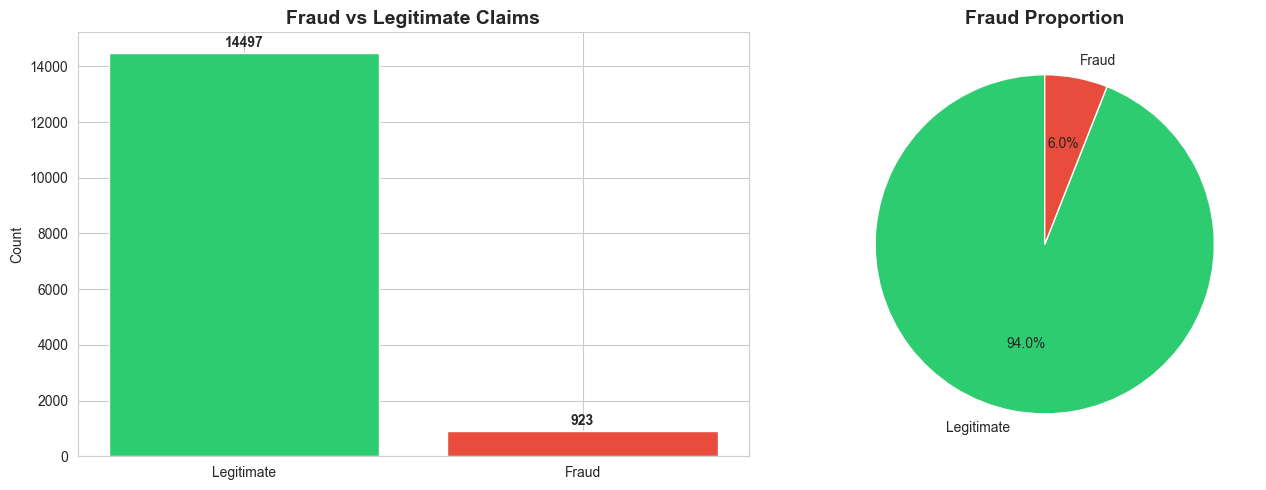

Class Imbalance Ratio: 1:15


In [6]:
# 3: Fraud distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
fraud_counts = df['FraudFound_P'].value_counts()
axes[0].bar(['Legitimate', 'Fraud'], fraud_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Fraud vs Legitimate Claims', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(fraud_counts.values):
    axes[0].text(i, v + 200, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(fraud_counts.values, labels=['Legitimate', 'Fraud'], 
            autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'],
            startangle=90)
axes[1].set_title('Fraud Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../data/processed/fraud_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Class Imbalance Ratio: 1:{int(fraud_counts[0]/fraud_counts[1])}")

In [7]:
# 4: Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove ID columns
numerical_cols = [col for col in numerical_cols if col not in ['PolicyNumber', 'FraudFound_P']]
print(f"Numerical features: {numerical_cols}")

Numerical features: ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'RepNumber', 'Deductible', 'DriverRating', 'Year']
